# Data Mining

## Assignment 1 Part 1 Questions

1. Consider the following sales data: [3, 16, 20, 4, 2, 5, 10, 9, 13, 7, 14, 8]. Apply the following binning techniques on the data, assuming 3 bins in each case:
  1. Equal-frequency binning
  2. Smoothing by bin boundaries

2. Use the below methods to normalize the following data: [10, 5, 25, 50, 35]:
  1. min-max normalization with min=0 and max=1.
  2. z-score normalization
  
3. Students at two universities, University A and University B, have been provided with feedback forms on student satisfaction, with the below responses recorded. Is student satisfaction correlated with a specific university? Use a chi-square test to find out, assuming a significance level of 0.001 and a corresponding chi-square significance value of 10.828. [1 mark out of 5]

|Rating/University |University A |University B |
|--------------- |---------- |---------- |
|Satisfied |71 |129 |
|Dissatisfied |37 |73 |

4. Load the CSV file country-income.csv which includes both numerical and categorical attributes. Perform data cleaning in order to replace any NaN values with the mean of the value for a given field. Then replace any categorical labels with numerical labels. Display the resulting dataset. You can use the sklearn.impute and sklearn.preprocessing packages to assist you.

5. Load the CSV file shoesize.csv, which includes measurements of shoe size and height (in inches) for 408 subjects, both female and male. Plot the scatterplots of shoe size versus height for female and male subjects separately. Compute the Pearson's correlation coefficient of shoe size versus height for female and male subjects separately. What can be inferred by the scatterplots and computed correlation coefficients? You can implement your own formulation of the correlation coefficient or use the scipy.stats package to assist you.

6. Using the pre-processed breast cancer dataset from subsection 1.1 of this notebook (which replaced any missing values with their median), perform Principal Component Analysis with 2 components. Compute the explained variance ratio for each component, and plot the scatterplot of all samples along the two principal components, color-coded according to the "Class" column (this column should not be used in the PCA analysis). Ensure that your data is normalized prior to performing PCA. What insights can you obtain by the explained variance ratio of each component, and by viewing the scatterplot of the principal components?

### Question 1A

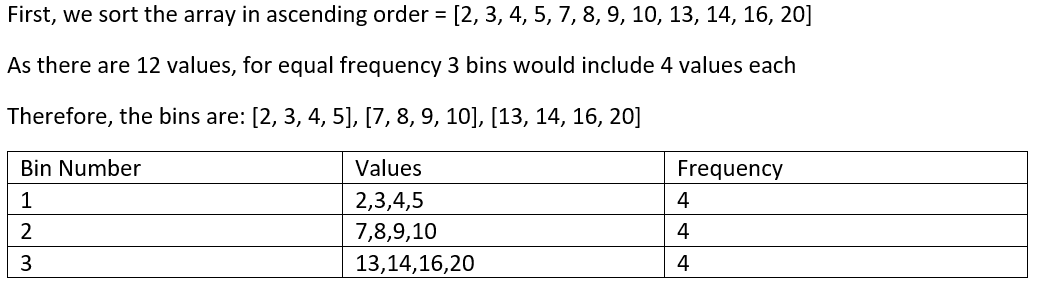

### Question 1B

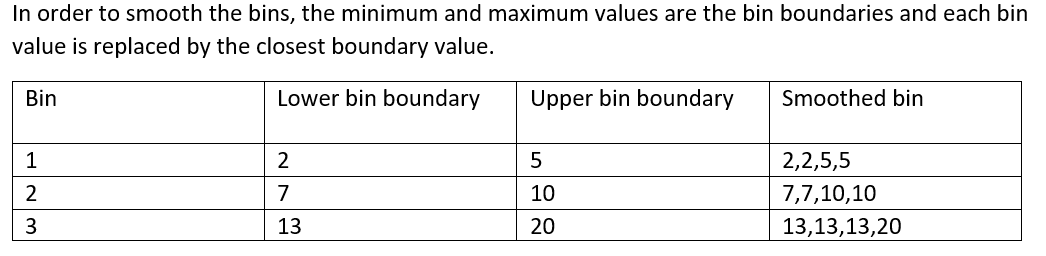

### Question 2A

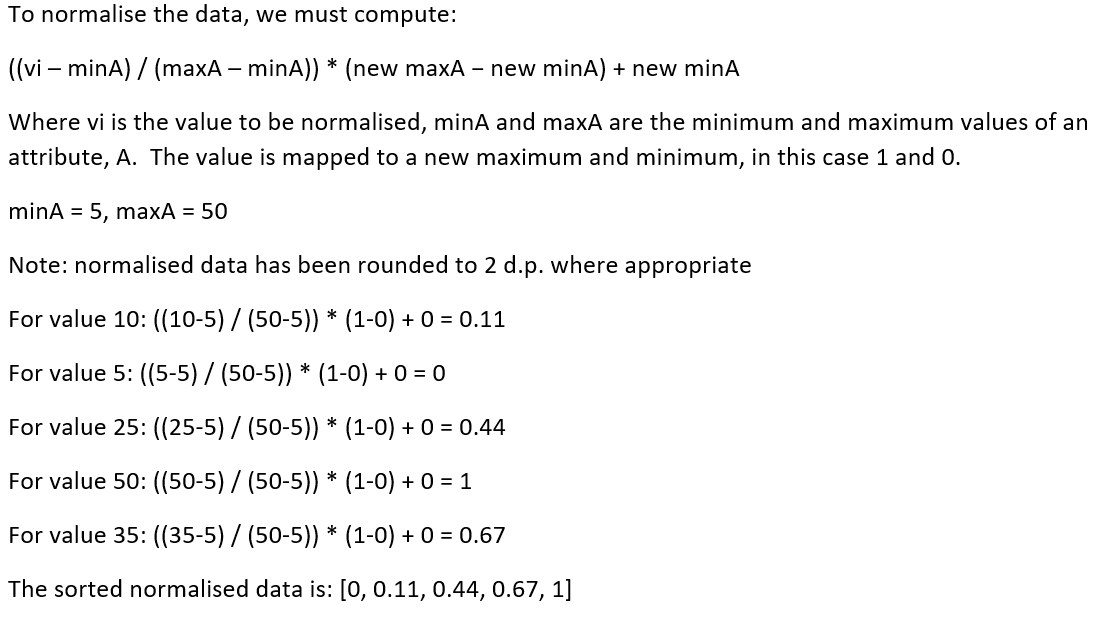

### Question 2B

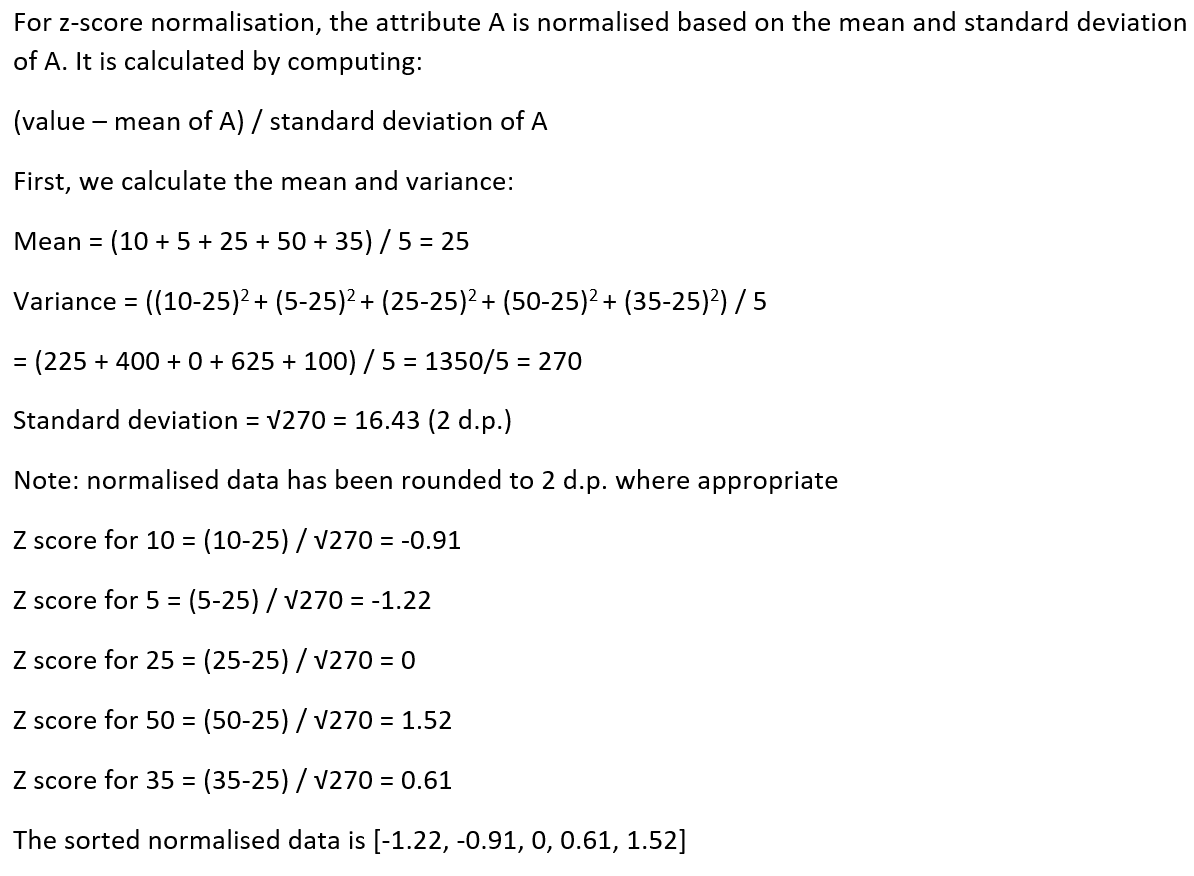

### Question 3

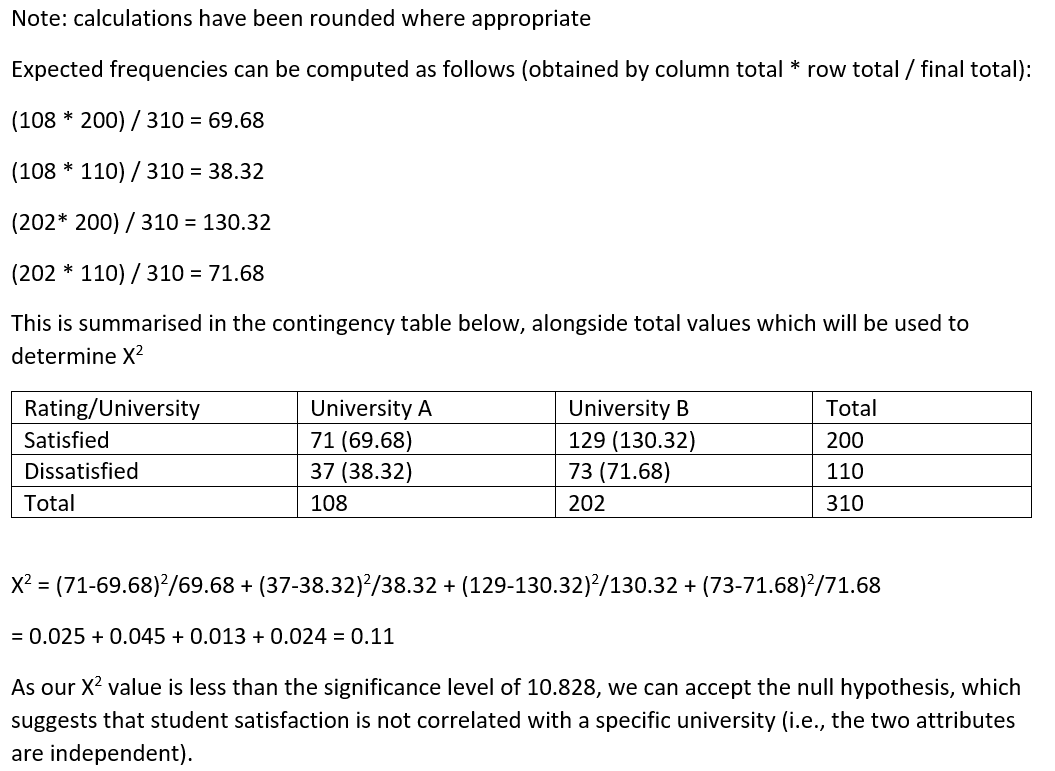

### Question 4

In [8]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Replacing the missing values in Age and Income with the mean of the data
df = pd.read_csv("country-income.csv")
imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
imputer = imputer.fit(df[['Age','Income']])
df[['Age','Income']] = imputer.transform(df[['Age','Income']])

# Replacing the Region with numerical labels
labelencoder = LabelEncoder()
df['Region'] = labelencoder.fit_transform(df['Region'])
df['Online Shopper'] = labelencoder.fit_transform(df['Online Shopper'])
df

,Region,Age,Income,Online Shopper
0,1,49.000000,86400.000000,0
1,0,32.000000,57600.000000,1
2,2,35.000000,64800.000000,0
3,0,43.000000,73200.000000,0
4,2,45.000000,76533.333333,1
5,1,40.000000,69600.000000,1
6,0,43.777778,62400.000000,0
7,1,53.000000,94800.000000,1
8,2,55.000000,99600.000000,0
9,1,42.000000,80400.000000,1


### Question 5

Text(0, 0.5, 'Height')

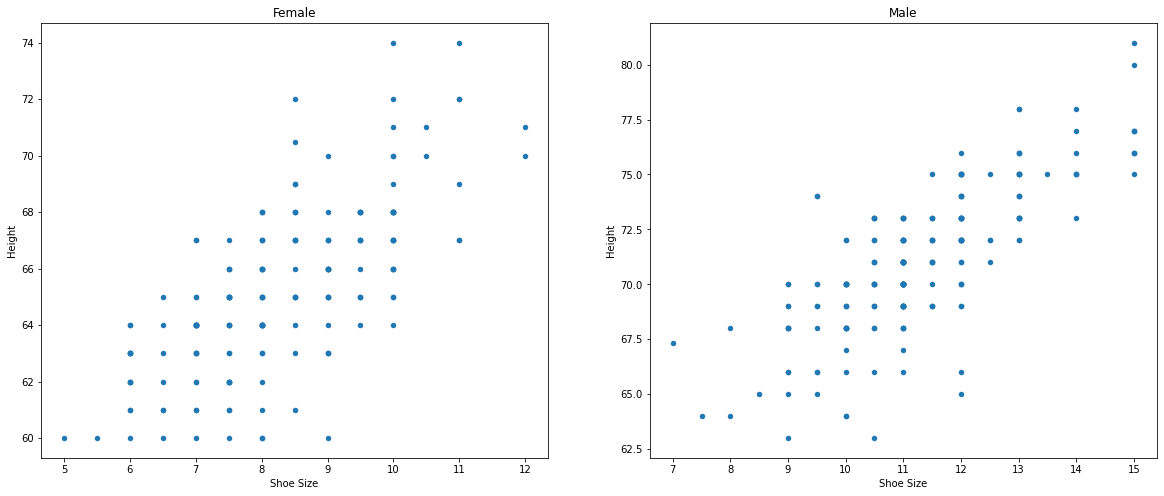

In [9]:
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("shoesize.csv")

# Selecting data for female and male
df_female = df[df['Gender'] == 'F']
df_male = df[df['Gender'] == 'M']


# Creating the sublptos for female and male
fig, (a1,a2) = plt.subplots(1,2, figsize=(20,8))

df_female.plot(kind='scatter',  x='Size', y='Height', ax=a1)
a1.set_title("Female")
a1.set_xlabel("Shoe Size")
a1.set_ylabel("Height")
df_male.plot(kind='scatter',  x='Size', y='Height', ax=a2)
a2.set_title("Male")
a2.set_xlabel("Shoe Size")
a2.set_ylabel("Height")

In [4]:
# Obtaining the correlation coefficients
pearsoncorr_female = df_female.corr(method='pearson')
pearsoncorr_male = df_male.corr(method='pearson')

female_coef, pvalue1 = stats.pearsonr(df_female.Height, df_female.Size)
male_coef, pvalue2 = stats.pearsonr(df_male.Height, df_male.Size)

print("The Pearson's correlation coefficient for female is %4.2f" % female_coef)
print("The Pearson's correlation coefficient for male is %4.2f" % male_coef)


The Pearson's correlation coefficient for female is 0.71
The Pearson's correlation coefficient for male is 0.77


Both of the scatter plots demonstrate a positive correlation; as the male or female shoe size increases the height increases. This is further reinforced by their respective Pearson's correlation coefficients, which are positive and relatively close to 1, which suggests a strong positive correlation.

### Question 6

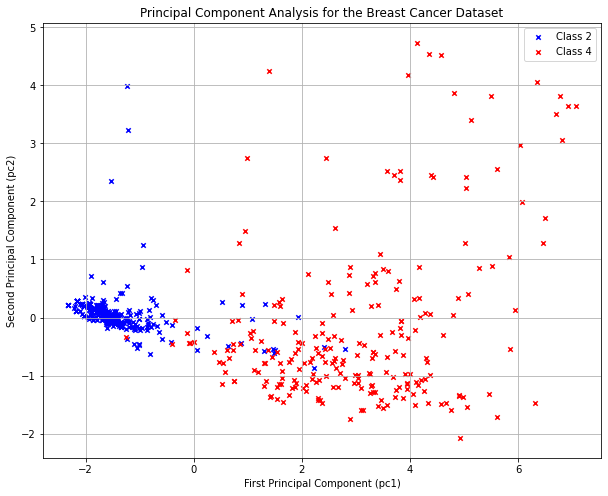

In [5]:
from sklearn.decomposition import PCA

data = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', 
    header=None)

data.columns = ['Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 
                'Uniformity of Cell Shape', 'Marginal Adhesion', 
                'Single Epithelial Cell Size', 'Bare Nuclei', 
                'Bland Chromatin', 'Normal Nucleoli', 'Mitoses','Class']

# Dropping the sample code (not required) and class (target variable)
data1 = data.drop(['Sample code' ,'Class'],axis=1)
data1 = data1.replace('?',np.NaN)

data1['Bare Nuclei'] = pd.to_numeric(data1['Bare Nuclei'])

# Replacing null values with the median
data1 = data1.fillna(data1.median())

# Normalisation by Z score
Z = (data1-data1.mean())/data1.std()

# Performing PCA for 2 components
numComponents = 2
pca = PCA(n_components=numComponents)

projected = pca.fit_transform(Z)

classes = data["Class"]

# Creating a new dataframe and adding a column for class
projected = pd.DataFrame(projected,columns=['pc1','pc2'])

projected = projected.join(classes)


# Plotting the PCA
colours = {2:'b', 4:'r'}
markerTypes = {2:'x', 4:'x'}

plt.figure(figsize=(10, 8))


for class_number in markerTypes:
    d = projected[projected['Class']==class_number]
    plt.scatter(d['pc1'],d['pc2'],c=colours[class_number],s=20,
                marker=markerTypes[class_number], 
                label = "Class " + str(class_number))
    
projected

plt.xlabel("First Principal Component (pc1)")
plt.ylabel("Second Principal Component (pc2)")
plt.title("Principal Component Analysis for the Breast Cancer Dataset")
plt.grid()
plt.legend()


In [6]:
# Displaying the variance ratio and total variance
print("The variance of each component is: ", pca.explained_variance_ratio_)
print("Total Variance Explained:", 
      round(sum(list(pca.explained_variance_ratio_))*100, 2))

The variance of each component is:  [0.65445704 0.0860859 ]
Total Variance Explained: 74.05


Principal component analysis reduces the number of variables by transforming them into principal components, whilst aiming to maintain the most important information. In this way, it allows us to view a compressed representation of the data.

As can be seen above, the explained variance ratios for pc1 and pc2 are approximately 65.4% and 8.6% respectively. They show the percentage of variance explained by each of the selected components. This demonstrates that the first principal component explains for majority of the variation, indicated by the greater spread of values on its axis. Moreover, the total explained variance is 74.05%, which demonstrates that the two principal components are able to explain most of the data.

The scatter plot shows the difference in the distribution of principal components for both classes. For class 2, the points are closer together which indicates their similarity. In contrast, the points for class 4 are much more widely spread and there is greater variation (less similarity) within the class. As there is a distinction between the distributions of class 2 and 4, this may indicate suitability for a classification model.

## Assignment 1 Part 2 Questions
1. In Section 1, what kind of relationship can be inferred from summary statistics regarding ``ACT composite score`` and ``SAT total score``? Which visualisations make this relationship apparent?

2. Based on the box plots presented in Section 1, what is the relationship between ``parental level of education`` and ``parental income``? Using table visualisation, find and show the entire rows that correspond to the outliers regarding ``parental income`` whose parents have a master's degree.

3. Using an example, explain the importance of scaling features so that their magnitudes are comparable when computing distances.

4. In Section 1, the distance matrix visualisation is not very informative. However, it is still possible to infer that the average distance between students whose parents only have some high school education and students whose parents have a master's degree is larger than the average distance between students whose parents only have some high school education. Explain how this inference is possible from the visualisation.

5. In Section 2, increase the number of evenly spaced numbers from 10 to 100 for both axes and observe the corresponding heat map created through nearest neighbour interpolation. Read about this interpolation method and explain what you observed.

6. The function ``load_wine`` from ``sklearn.datasets`` can be used to load the *wine dataset* into a ``DataFrame`` by using the commands ``data = load_wine()``, ``df = pd.DataFrame(data.data, columns=data.feature_names)``, and ``df['target'] = pd.Series(data.target)``.

    6.1. Load the wine dataset. Compute the frequency of each value of the 'target' feature.
    
    6.2. Compute univariate and multivariate summaries for all numerical features (except from the target feature). Group observations by the target feature and compute the corresponding **median** for each numerical feature.
    
    6.3. Group observations by the target feature and create one box plot of ``alcohol`` for each group.
    
    6.4. Create a scatter plot for the pair of **distinct** numerical features with the highest correlation.
    
    6.5. Exclude the target feature, standardize the remaining numerical features, and display a projection obtained by multidimensional scaling. Color the points by the target feature.

### Question 1

Looking at the univariate summaries for ACT composite score and SAT total score, we can see that they have different ranges. Therefore, it would be difficult to make comparisons of the summaries without standardisation. 

The correlation coefficient for ACT composite score and SAT total score is 0.89 (to 2 decimal places) which indicates a strong positive correlation. As the ACT composite score increases, the SAT total score also increases. This suggests that students who perform well in the ACT are likely to perform well in the SAT, and vice versa.

This correlation is further reinforced by the scatter plot visualisation of ACT composite score against SAT total score, which shows a positive correlation.

### Question 2



From the boxplots, it is evident that as the parental level of education increases, the parental income tends to increase. This is indicated by the respective univariate sumamry values (such as the median, lower quartile and upper quartile) which generally increase as the parenteral level of education increases. We can also see that the general position of the box plot is 'shifted' upwards indicating that the data is distributed in a region of higher parental income with increases in the parental level of education.

In [7]:
df = pd.read_csv('graduation_rate.csv')

education_order = ['some high school', 'high school', 'some college', 
                   "associate's degree", "bachelor's degree", 
                   "master's degree"]

# Selecting data where parental level of education is master's degree
df['parental level of education'] = pd.Categorical(df['parental level of education'],
                                                   ordered=True,
                                                   categories=education_order)

df_masters = df[df['parental level of education'] == "master's degree"]

print("Selecting data where parental level of education is master's degree: ")
df_masters

Selecting data where parental level of education is master's degree: 


,ACT composite score,SAT total score,parental level of education,parental income,high school gpa,college gpa,years to graduate
0,30,2206,master's degree,94873,4.0,3.8,3
27,28,2058,master's degree,96573,3.9,3.6,4
37,34,2363,master's degree,90775,4.0,3.6,4
65,32,2161,master's degree,75974,4.0,3.8,3
99,30,2223,master's degree,85135,4.0,3.8,3
...,...,...,...,...,...,...,...
912,31,2078,master's degree,83814,3.9,3.5,4
927,33,2330,master's degree,92185,4.0,3.8,4
929,35,2338,master's degree,79398,4.0,3.7,4
964,27,1999,master's degree,93314,3.7,3.3,5


Above we have selected all rows where the parental level of education is "master's degree". We will now determine quantiles of the parental income and identify outliers smaller than 1.5 x lower quartile and larger than 1.5 x upper quartile.

In [8]:
# Selecting outliers for the above dataframe
Q1 = df_masters.iloc[:, 3].quantile(0.25)
Q3 = df_masters.iloc[:, 3].quantile(0.75)
    
IQR = Q3 - Q1

outliers = df_masters.loc[((df_masters.iloc[:, 3] < (Q1 - 1.5 * IQR)) | 
                           (df_masters.iloc[:, 3] > (Q3 + 1.5 * IQR)))]

print("Selecting outliers: ")
display(outliers)

Selecting outliers: 


,ACT composite score,SAT total score,parental level of education,parental income,high school gpa,college gpa,years to graduate
411,31,2108,master's degree,120391,4.0,3.6,4
420,28,2097,master's degree,59724,3.9,3.2,4


### Question 3

For this question, we will use the example of the distances between the ACT composite score and the SAT total score. Looking at the univariate summary for the ACT and SAT scores below, it would not be fair to make comparisons such as "the mean of the SAT score is higher than the mean of the ACT score" or "the distance between the mean scores is 1970" . This is because the marks for both tests are on a different scale (as shown by their min and max values), as can be seen by the differences in the values of the univariate summary. Therefore, scaling is important.

In [9]:
# Comparing univariate summaries of ACT an SAT
df_ACT_SAT = df.loc[:, ['ACT composite score', 'SAT total score']]
df_ACT_SAT.describe()

,ACT composite score,SAT total score
count,1000.000000,1000.000000
mean,28.557000,1997.803000
std,2.776051,142.736442
min,19.000000,1498.000000
25%,27.000000,1907.750000
50%,29.000000,1999.000000
75%,30.000000,2092.250000
max,36.000000,2397.000000


This univariate summary has been standardised below, using min-max normalisation for ease of interpretation.

In [11]:
# Normalising the univariate summaries of ACT and SAT using min-max
minimum = df_ACT_SAT.min()
maximum = df_ACT_SAT.max()
df_ACT_SAT_scaled = (df_ACT_SAT-minimum)/(maximum-minimum)
df_ACT_SAT_scaled.describe()

,ACT composite score,SAT total score
count,1000.000000,1000.000000
mean,0.562176,0.555954
std,0.163297,0.158772
min,0.000000,0.000000
25%,0.470588,0.455784
50%,0.588235,0.557286
75%,0.647059,0.661012
max,1.000000,1.000000


As can be seen above, we have transformed the min and max values for both scores to a smaller range of 0 to 1. The min-max normalised mean values for each test are much closer, where the mean of the ACT score is very slightly higher than the mean of the SAT score. This demonstrates the importance of scaling features to avoid misleading conclusions. 

### Question 4

Prior to creation of the distance matrix, we sorted by the ordinal feature "paternal level of education" in ascending order, such that the resulting dataframe was ordered from "some high school" to "master's degree" (including the 6 unique values of the parental level of education). Since this is not numerical, it was dropped prior to creation of the distance matrix. However, the resulting dataframe still maintains this ordering.

As such, the heat map for the corresponding distance matrix will be resemble a 6 x 6 square. Using the annotated sketch of the distance matrix below, we explain how it is possible to make inferences.

From left to right and top to bottom there are squares corresponding to each of "some high school" to "master's degree". Thus, on the bottom left square we would see the average distance between students whose parents have some high school education and students whose parents have a master's degree. On the other hand, the top left square would show the average distance between students whose parents only have some high school education. As the bottom left appears darker than the top left, this indicates a greater difference between the average distances in the students whose parents have some high school education and students whose parents have a master's degree.

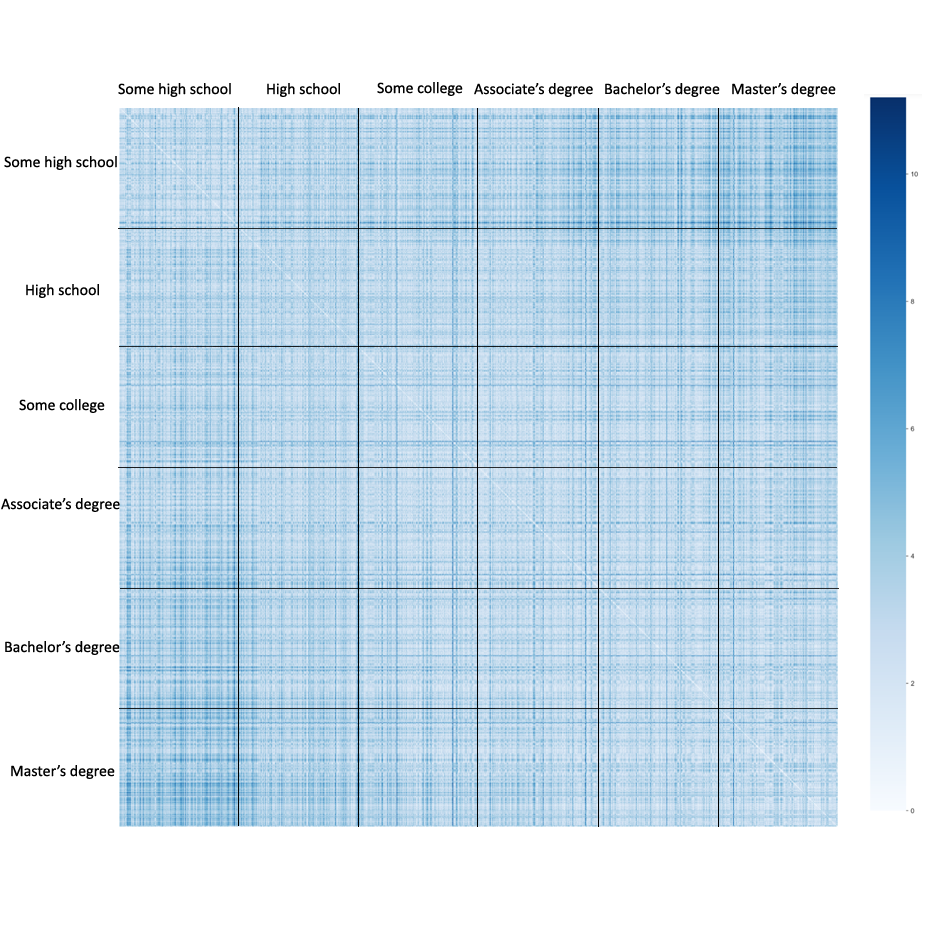

### Question 5

Interpolation is able to estimate new data points from an existing set of known data points, by estimating as a function of the "neighbouring" points around the new data point. 

However, nearest-neighbour interpolation only selects the closest point and takes its value, instead of all neighbouring points. In this sense, it is a very simple approach to interpolation as it does not involve weighting criteria or averages. Therefore, by increasing the number of evenly spaced numbers, the nearest neighbour for a new data point would be much closer in the sample of 100 (creating a smoother colour gradient) when compared to the original sample of 10. There is less difference between the colour darkness of each point, which leads to the creation of a smoother colour gradient.

### Question 6

### Question 6.1

In [11]:
from sklearn.datasets import load_wine
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = pd.Series(data.target)

# Calculating frequency of the target features
print("Frequency of target features: ")
freq_target = df['target'].value_counts()/len(df)
freq_target

Frequency of target features: 


1    0.398876
0    0.331461
2    0.269663
Name: target, dtype: float64

### Question 6.2

In [ ]:
# Univariate summary for numerical features (except target)
df_target_dropped = df.drop(columns='target')
print('Univariate summary for numerical features (excluding target):')
df_target_dropped.describe()

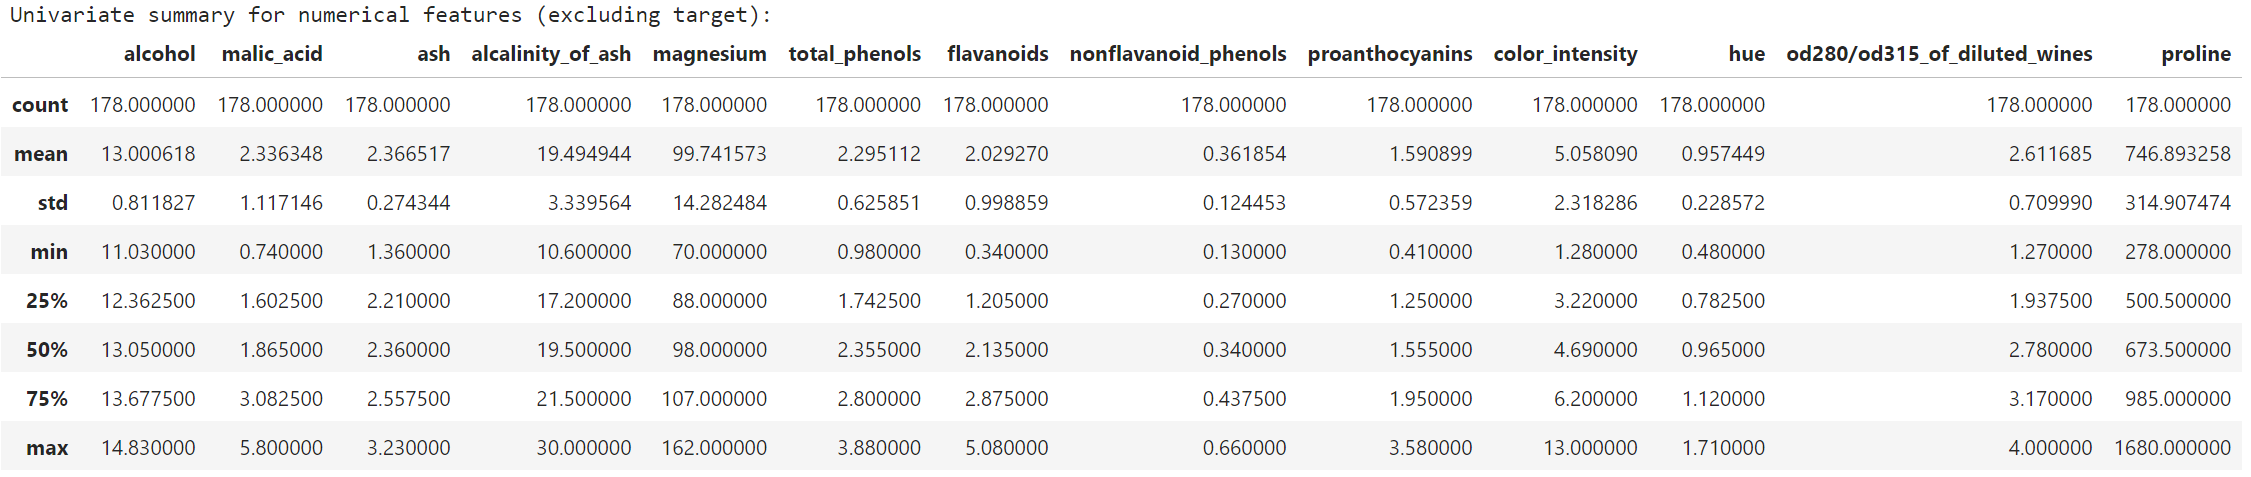

In [ ]:
# Correlation matrix for the numerical features (except target)
print("Multivariate summary using correlation coefficients:")
df_target_dropped.corr()

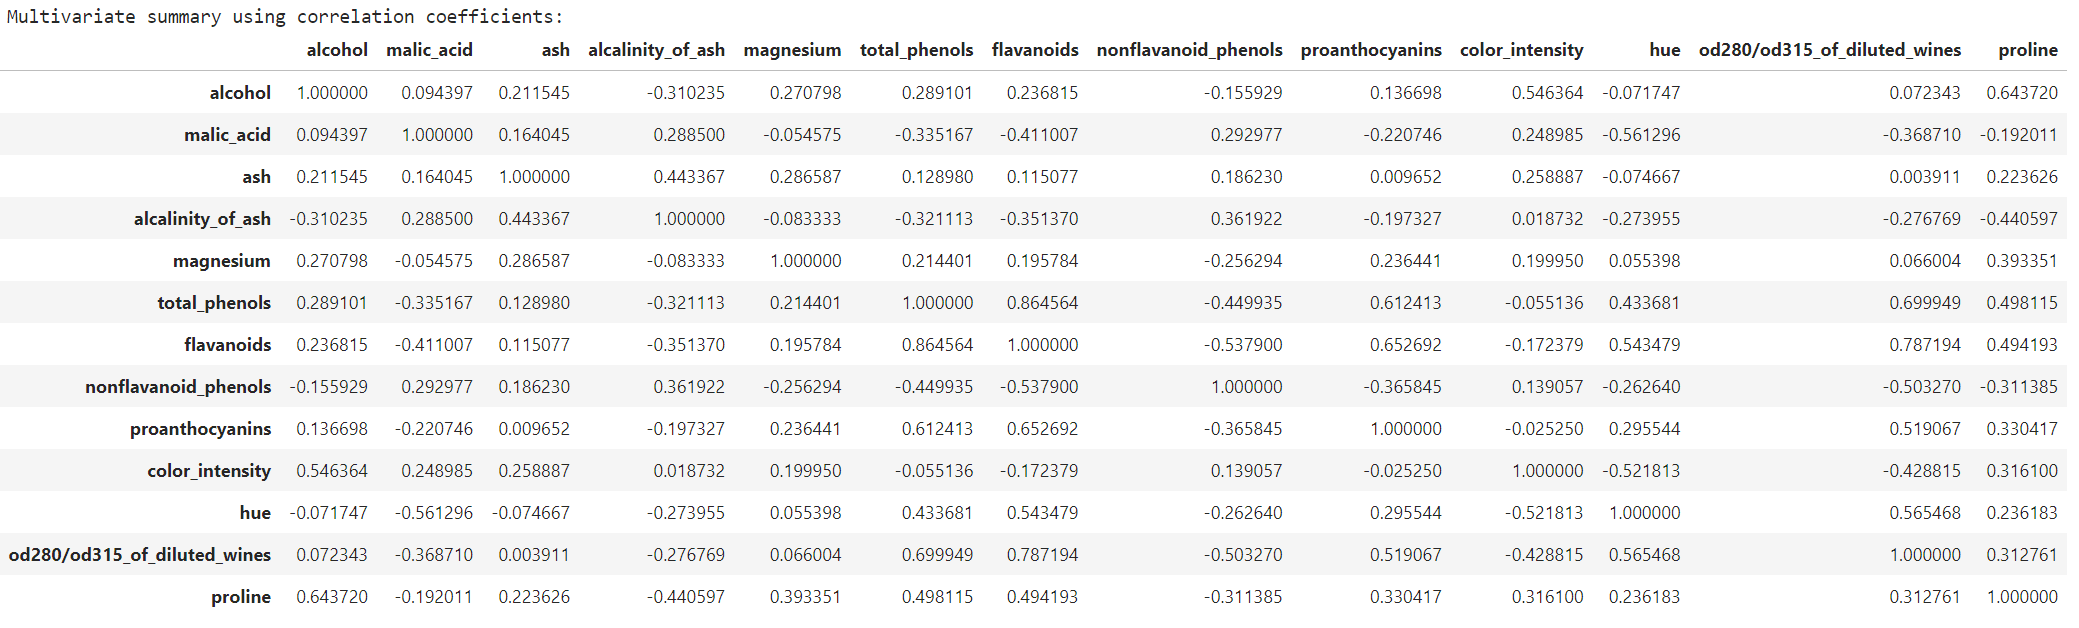

In [ ]:
# Grouping the data by target, and determining the median of each attribute
df_groupby_target = df.groupby('target').median()
print('Median grouped by target:')
df_groupby_target

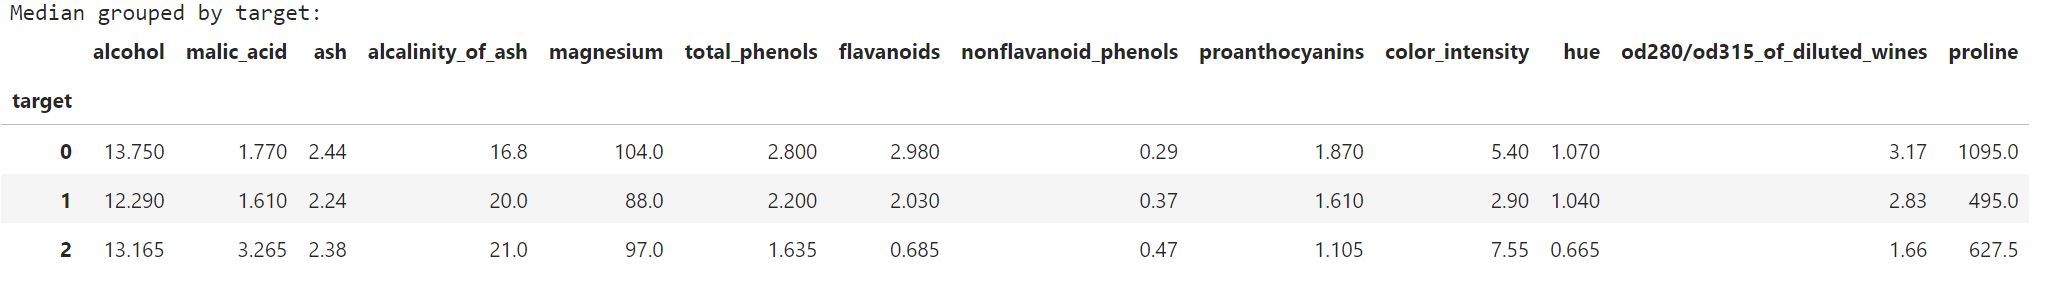

### Question 6.3

Text(0.5, 1.0, 'Boxplot: alcohol, grouped by target')

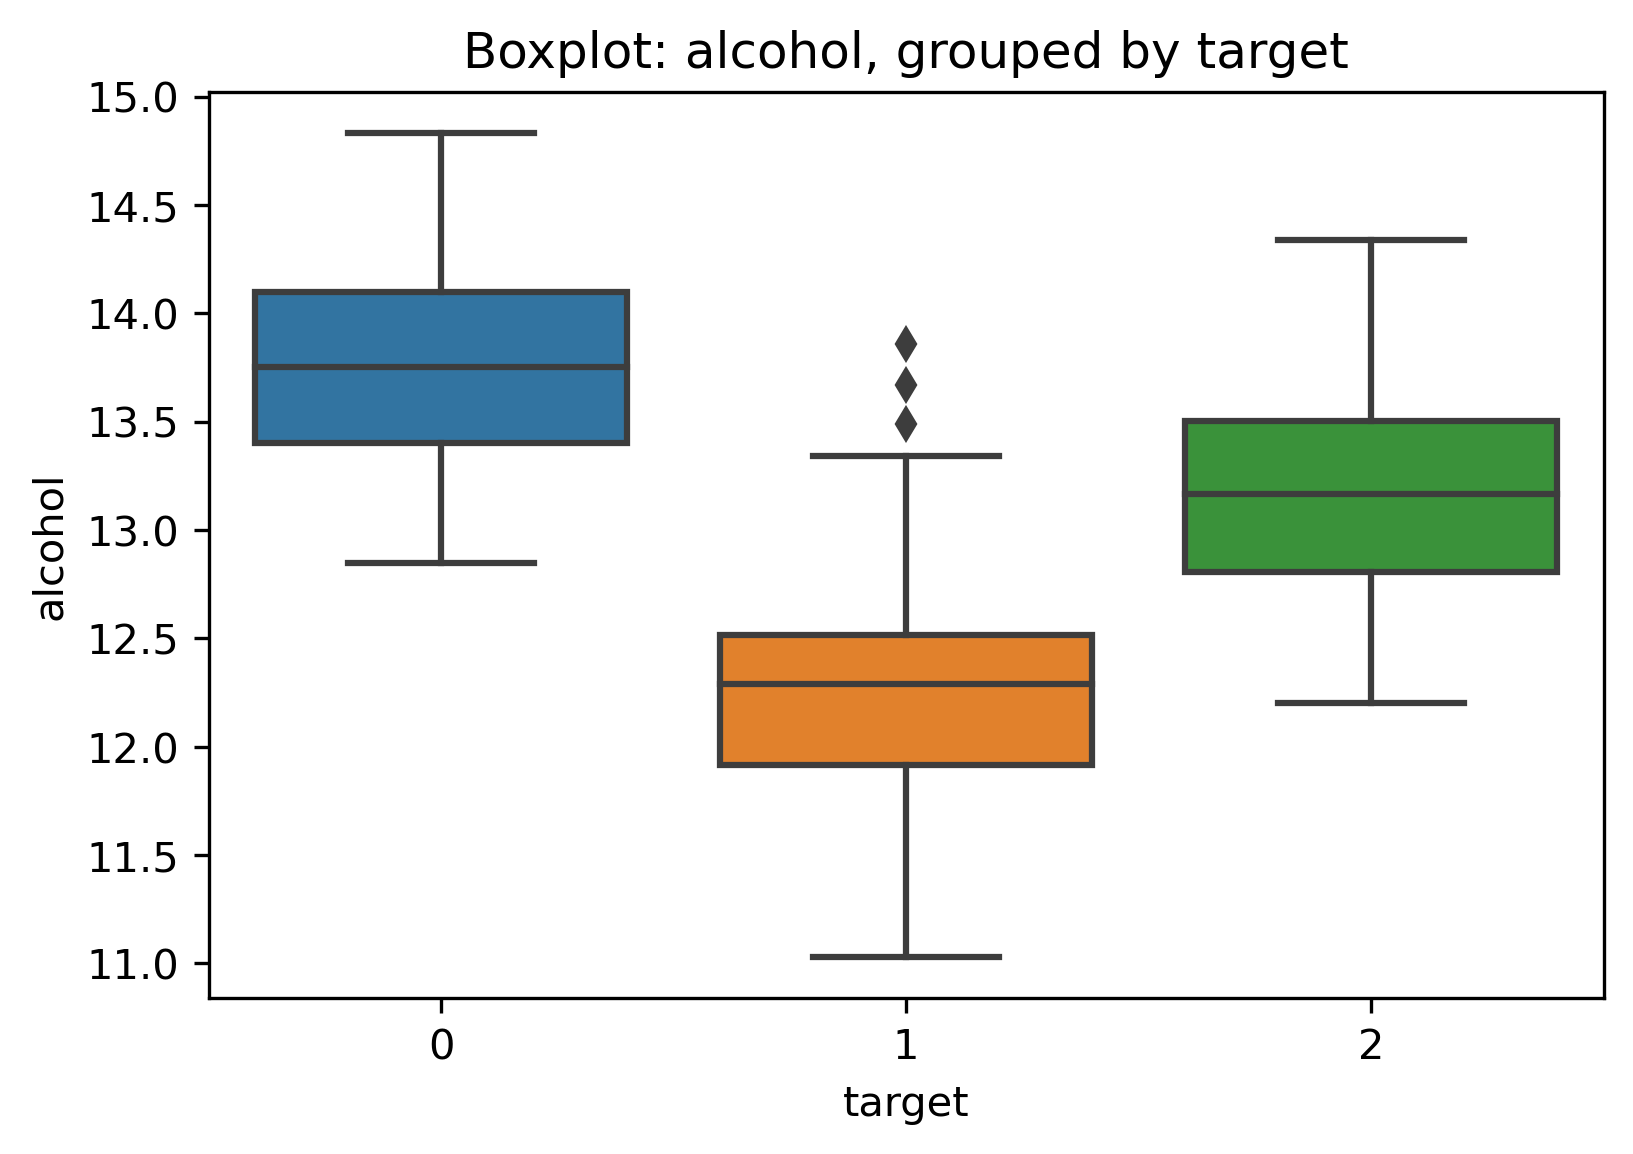

In [14]:
# Boxplots of alcohol, grouped by target
%config InlineBackend.figure_formats = set(['retina'])
import seaborn as sns
from matplotlib.pyplot import figure
figure(dpi=150)
ax = sns.boxplot(x='target', y='alcohol', data=df)
plt.title('Boxplot: alcohol, grouped by target')

### Question 6.4

The pair with the highest correlation coefficient exists between 'total_phenols' and 'flavanoids' as seen in the correlation matrix for question 6.2

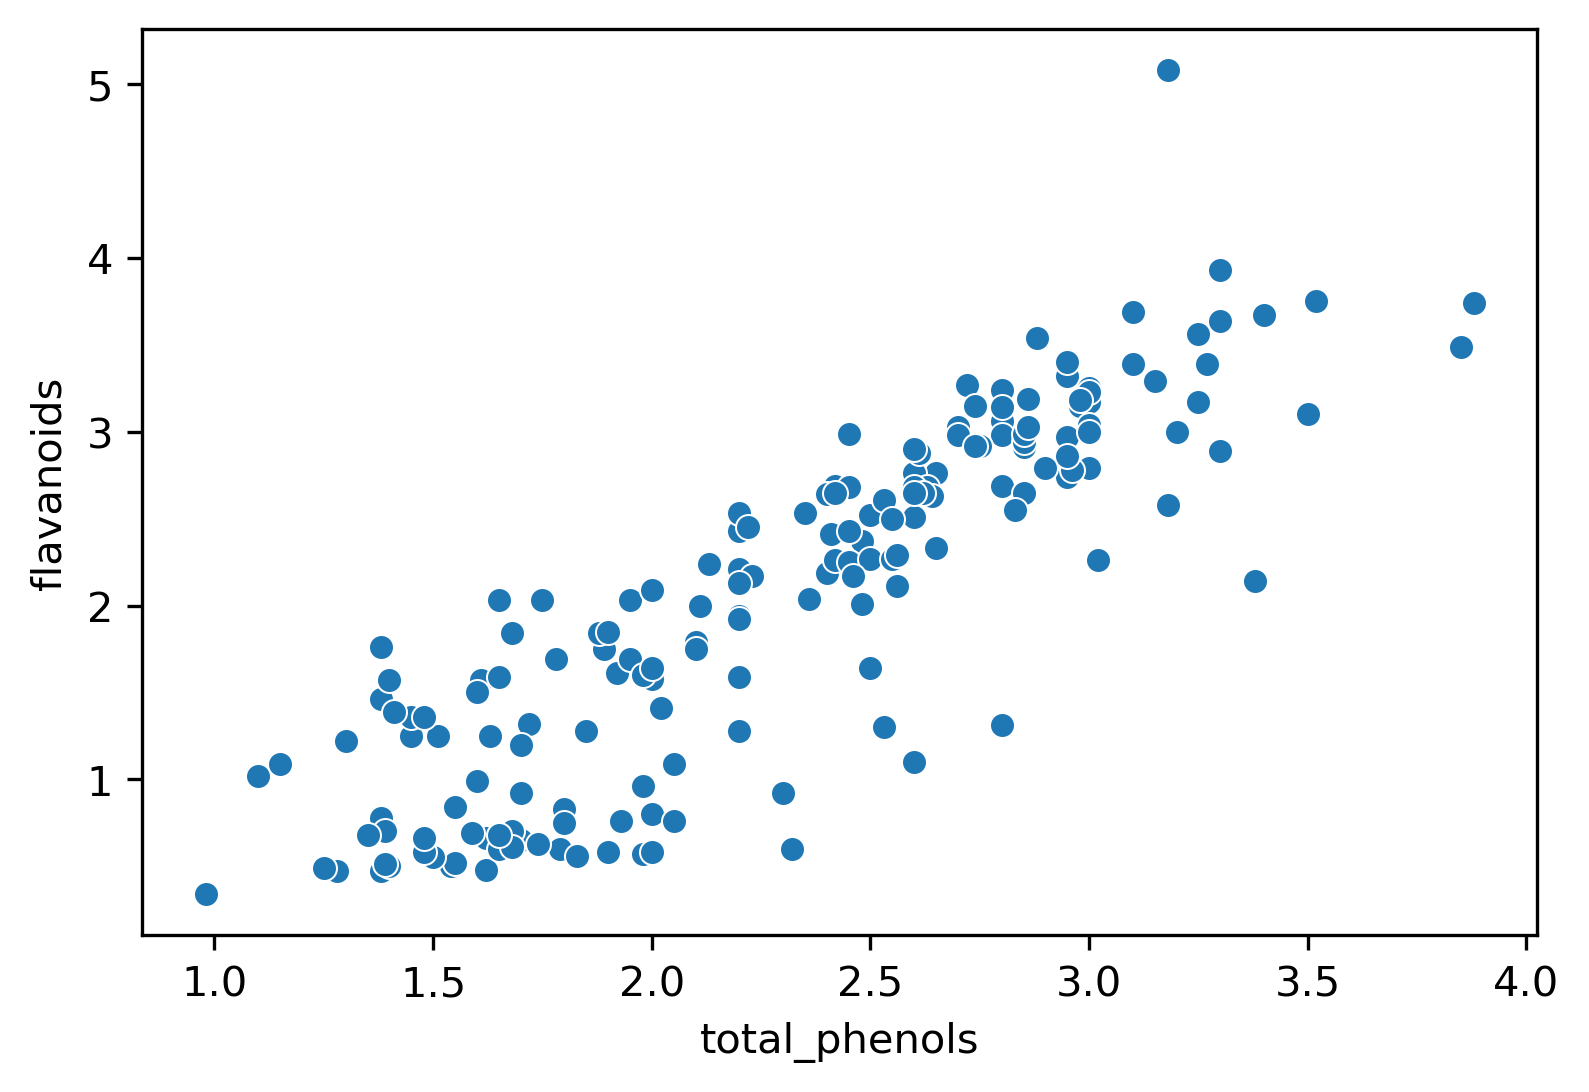

In [15]:
# Plotting scatter for total_phenols vs flavanoids
figure(dpi=150)
sns.scatterplot(x='total_phenols', y='flavanoids', data=df)
plt.show()

### Question 6.5

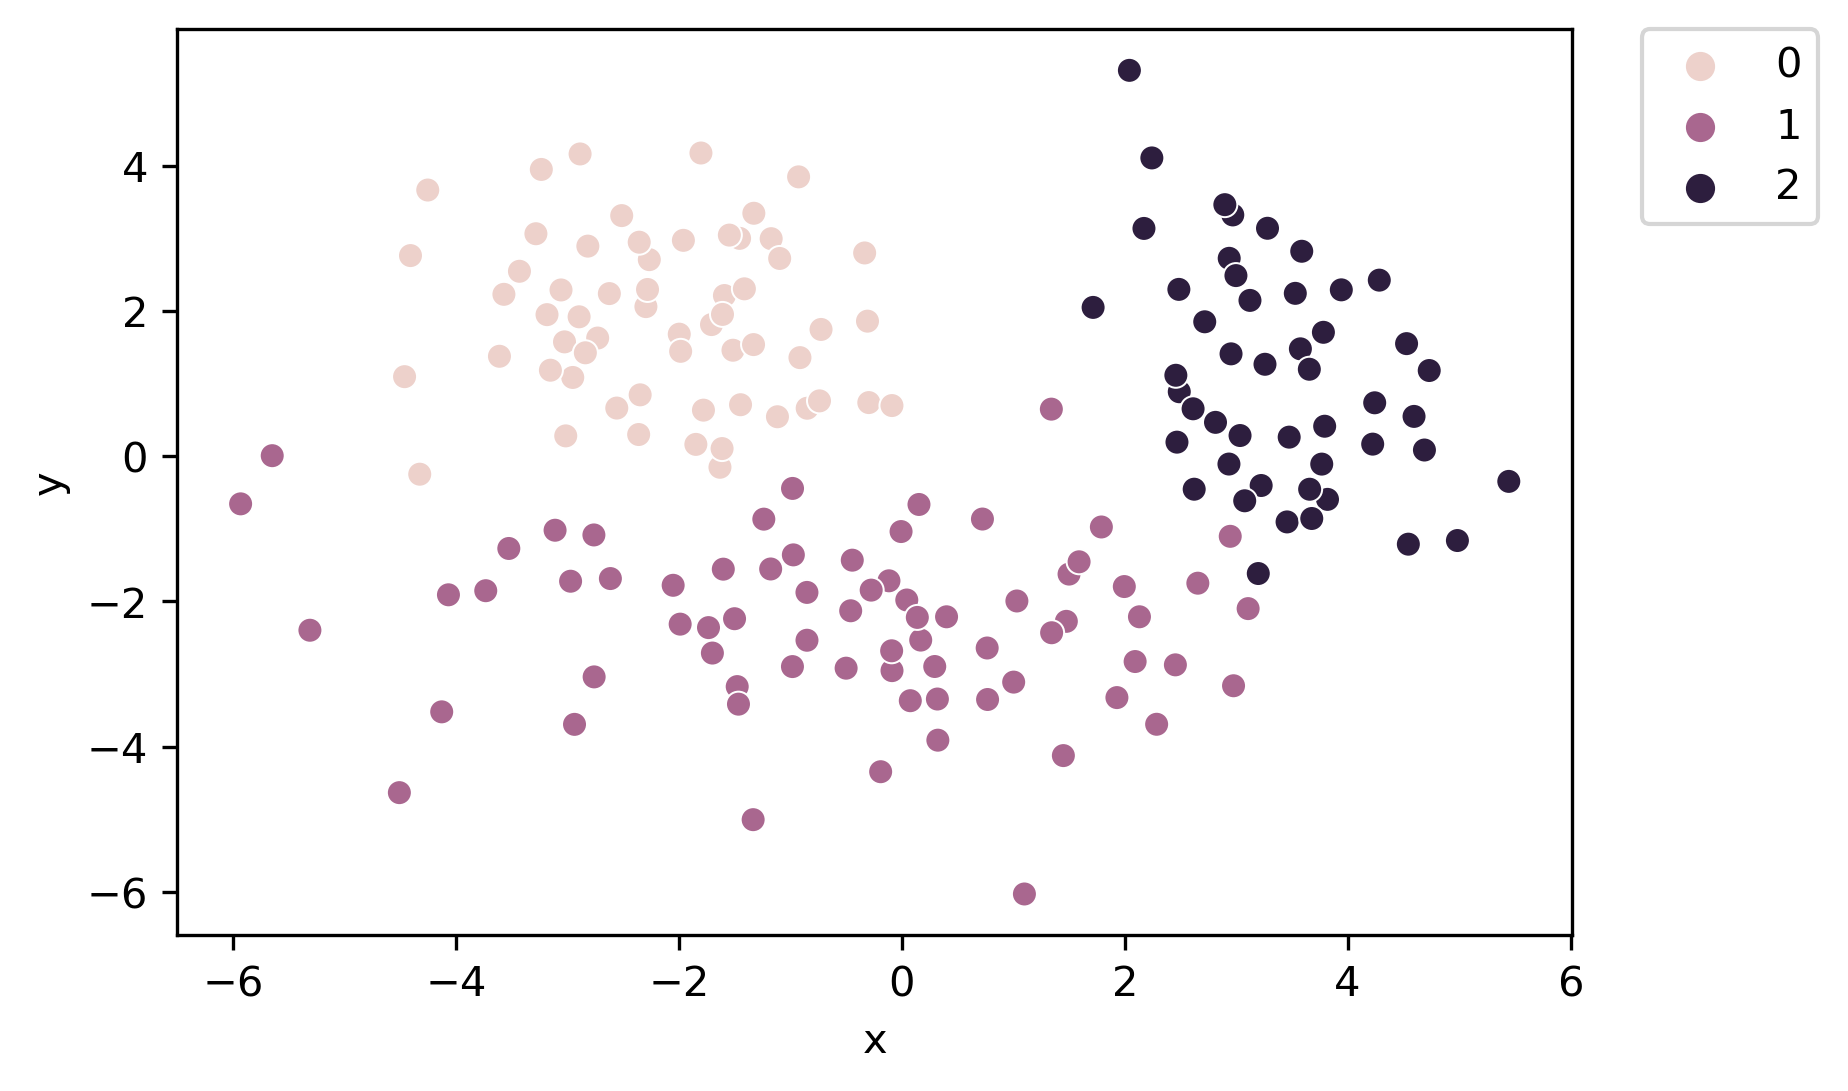

In [16]:
from sklearn.manifold import MDS
from sklearn.preprocessing import StandardScaler

figure(dpi=150)

df_sorted = df.sort_values(by='target', ascending=True)
target_sorted = df_sorted['target']

scaler = StandardScaler()

# Multidimensional scaling excluding target, for 2 components
embedding = MDS(n_components=2)

X = df_sorted.drop(columns='target').to_numpy()
X = scaler.fit_transform(X)
    
Xp = embedding.fit_transform(X)
df_projection = pd.DataFrame({'x': Xp[:, 0], 'y': Xp[:, 1],
                              'target': target_sorted})

sns.scatterplot(x='x', y='y', hue='target', data=df_projection)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()